In [305]:
import pandas as pd
from config_reader import read_config

# Reading paths
paths = read_config()
# Path to where we will save our processed files
OUTDIR = paths['PLOTS_FOLDER_LOCAL']

In [187]:
# Reading matches data
df_matches = pd.read_csv("/Users/sm9654/desktop/NYUAD/nyuad-research/retraction_openalex/retraction_effects_on_academic_careers/data/processed/author_matching/RWMAG_rematched_control_augmented_rematching_30perc.csv",
                        usecols=['MAGAID','MatchMAGAID','RetractionYear'])\
                .drop_duplicates()

# Reading coordinates and collabs data
df_collabs_geo = pd.read_csv("/Users/sm9654/desktop/NYUAD/nyuad-research/retraction_openalex/retraction_effects_on_academic_careers/data/processed/pre_post_analysis/collab_geo_prepost.csv",
                            )


/var/folders/bf/_6xjm2bn2_n17hfhskyq1pmw0000gp/T/ipykernel_8962/3512121950.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_collabs_geo = pd.read_csv("/Users/sm9654/desktop/NYUAD/nyuad-research/retraction_openalex/retraction_effects_on_academic_careers/data/processed/pre_post_analysis/collab_geo_prepost.csv",


# Fixing affiliations

In [224]:
df_collabs_geo

,MAGAID,ScientistType,MAGCollaborationYear,MAGCollabAID,YearOfAttrition,RetractionYear,FirstCollaborationYear,RyearMinusCollabYear,PrePostFlag,Post_Count,...,MAGCollabAffRank,MAGMaxCollabAffYearByCollabYear,MAGAffName,MAGAffLatLong,MAGAffCountry,MAGAffCity,MAGCollabAffName,MAGCollabAffLatLong,MAGCollabAffCountry,MAGCollabAffCity
0,2.105038e+09,retracted,1992.0,2658824643,2000.0,1994.0,1992.0,2.0,Pre,4.0,...,NaN,1992.0,australian national university,"-35.2778,149.1205",Australia,"Canberra,Australia",monash university clayton campus,"-37.91,145.134",Australia,"Melbourne,Australia"
1,2.105038e+09,retracted,1992.0,2698118962,2000.0,1994.0,1992.0,2.0,Pre,4.0,...,NaN,1992.0,australian national university,"-35.2778,149.1205",Australia,"Canberra,Australia",monash university clayton campus,"-37.91,145.134",Australia,"Melbourne,Australia"
2,2.105038e+09,retracted,1983.0,1612051705,2000.0,1994.0,1983.0,11.0,Pre,4.0,...,76,1983.0,australian national university,"-35.2778,149.1205",Australia,"Canberra,Australia",australian national university,"-35.2778,149.1205",Australia,"Canberra,Australia"
3,2.105038e+09,retracted,1983.0,1612051705,2000.0,1994.0,1983.0,11.0,Pre,4.0,...,76,1983.0,australian national university,"-35.2778,149.1205",Australia,"Canberra,Australia",australian national university,"-35.2778,149.1205",Australia,"Canberra,Australia"
4,2.105038e+09,retracted,1983.0,1612051705,2000.0,1994.0,1983.0,11.0,Pre,4.0,...,76,1983.0,australian national university,"-35.2778,149.1205",Australia,"Canberra,Australia",australian national university,"-35.2778,149.1205",Australia,"Canberra,Australia"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053037,2.294600e+09,matched,2015.0,2788267233,2020.0,2012.0,2015.0,-3.0,Post,54.0,...,101-150,2014.0,boston children s hospital,"42.337270000000004,-71.10600000000001",United States,"Boston,MA,United States",michigan state university,"42.723,-84.48100000000001",United States,"East Lansing,MI,United States"
7053038,2.294600e+09,matched,2015.0,2788267233,2020.0,2012.0,2015.0,-3.0,Post,54.0,...,101-150,2014.0,boston children s hospital,"42.337270000000004,-71.10600000000001",United States,"Boston,MA,United States",michigan state university,"42.723,-84.48100000000001",United States,"East Lansing,MI,United States"
7053039,2.294600e+09,matched,2015.0,3037644157,2020.0,2012.0,2015.0,-3.0,Post,54.0,...,NaN,2014.0,spectrum health,"42.96989,-85.66511",United States,"Grand Rapids,MI,United States",spectrum health,"42.96989,-85.66511",United States,"Grand Rapids,MI,United States"
7053040,2.294600e+09,matched,2015.0,3037644157,2020.0,2012.0,2015.0,-3.0,Post,54.0,...,NaN,2014.0,boston children s hospital,"42.337270000000004,-71.10600000000001",United States,"Boston,MA,United States",spectrum health,"42.96989,-85.66511",United States,"Grand Rapids,MI,United States"


In [221]:
df_collabs_geo[df_collabs_geo['MAGCollabAffLatLong'].isna()]['MAGAID'].nunique()

2166

In [222]:
df_collabs_geo[df_collabs_geo['MAGAffLatLong'].isna() & 
                        ~df_collabs_geo['MAGAffID'].isna()]['MAGAID'].nunique()

225

In [223]:
indir_mag = "/Users/sm9654/desktop/NYUAD/nyuad-research/retraction_openalex/retraction_effects_on_academic_careers/data/mag/"
df_affiliations = pd.read_csv(indir_mag+"Affiliations.txt", sep="\t", header=None, 
                             usecols=[0,2,10, 11,12])\
                            .rename(columns={0:'MAGAffID',
                                            2:'MAGAffName',
                                            10:'MAGAffCountryAbbr',
                                            11: 'MAGAffLat',
                                            12: 'MAGAffLong'})

df_affiliations['MAGAffLatLong'] = df_affiliations['MAGAffLat'].astype(str) \
                                        + "," + df_affiliations['MAGAffLong'].astype(str)

df_affiliations

,MAGAffID,MAGAffName,MAGAffCountryAbbr,MAGAffLat,MAGAffLong,MAGAffLatLong
0,20455151,air liquide,GB,52.503593,-1.805160,"52.5035934,-1.80516"
1,24386293,hellenic national meteorological service,GR,37.976140,23.736400,"37.97614,23.7364"
2,32956416,catholic university of the west,FR,47.464720,-0.548610,"47.46472,-0.54861"
3,35926432,mackay medical college,TW,25.254360,121.495087,"25.25436,121.495087"
4,37448385,chinese people s public security university,CN,39.904690,116.407173,"39.90469,116.407173"
...,...,...,...,...,...,...
27028,3130807960,diamond harbour women s university,IN,22.258074,88.195140,"22.2580738,88.19514"
27029,3131031036,mediterranean school of business,TN,36.846280,10.268974,"36.84628,10.2689743"
27030,3132176766,torbat heydarieh university of medical sciences,IR,35.282295,59.219544,"35.2822952,59.2195435"
27031,3132554608,university of the latin american educational c...,AR,-32.955547,-60.644134,"-32.9555473,-60.6441345"


In [225]:
# We will drop the old columns: MAGAffName, MAGAffLatLong, MAGCollabAffName, MAGCollabAffLatLong

columns_to_drop = ['MAGAffName', 'MAGAffLatLong', 'MAGCollabAffName', 'MAGCollabAffLatLong']

# Fixing treatment

df_collabs_geo = df_collabs_geo.drop(columns=columns_to_drop)\
                                .drop_duplicates().merge(df_affiliations, on='MAGAffID')
df_collabs_geo = df_collabs_geo\
                                .merge(df_affiliations.rename(columns={'MAGAffID':'MAGCollabAffID',
                                                                      'MAGAffName':'MAGCollabAffName',
                                                                      'MAGAffCountryAbbr':'MAGCollabAffCountryAbbr',
                                                                      'MAGAffLat':'MAGCollabAffLat',
                                                                      'MAGAffLong':'MAGCollabAffLong',
                                                                      'MAGAffLatLong':'MAGCollabAffLatLong'}), 
                                                              on='MAGCollabAffID')
                                       
df_collabs_geo                           

,MAGAID,ScientistType,MAGCollaborationYear,MAGCollabAID,YearOfAttrition,RetractionYear,FirstCollaborationYear,RyearMinusCollabYear,PrePostFlag,Post_Count,...,MAGAffName,MAGAffCountryAbbr,MAGAffLat,MAGAffLong,MAGAffLatLong,MAGCollabAffName,MAGCollabAffCountryAbbr,MAGCollabAffLat,MAGCollabAffLong,MAGCollabAffLatLong
0,2.105038e+09,retracted,1992.0,2658824643,2000.0,1994.0,1992.0,2.0,Pre,4.0,...,australian national university,AU,-35.27780,149.12050,"-35.2778,149.1205",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134"
1,2.105038e+09,retracted,1992.0,2698118962,2000.0,1994.0,1992.0,2.0,Pre,4.0,...,australian national university,AU,-35.27780,149.12050,"-35.2778,149.1205",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134"
2,2.001336e+09,retracted,2001.0,2554923814,2020.0,2007.0,2001.0,6.0,Pre,21.0,...,university of cambridge,GB,52.20528,0.11722,"52.20528,0.11722",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134"
3,2.001336e+09,retracted,2001.0,2554923814,2020.0,2007.0,2001.0,6.0,Pre,21.0,...,university of cambridge,GB,52.20528,0.11722,"52.20528,0.11722",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134"
4,2.001336e+09,retracted,2001.0,3165105367,2020.0,2007.0,2001.0,6.0,Pre,21.0,...,university of cambridge,GB,52.20528,0.11722,"52.20528,0.11722",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053037,2.589751e+09,matched,2020.0,1131436997,2020.0,2015.0,2020.0,-5.0,Post,6.0,...,university of oradea,RO,47.04556,21.92000,"47.04556,21.92",university of oradea,RO,47.04556,21.920,"47.04556,21.92"
7053038,2.589751e+09,matched,2020.0,2031985322,2020.0,2015.0,2020.0,-5.0,Post,6.0,...,university of oradea,RO,47.04556,21.92000,"47.04556,21.92",university of oradea,RO,47.04556,21.920,"47.04556,21.92"
7053039,2.589751e+09,matched,2020.0,2031985322,2020.0,2015.0,2020.0,-5.0,Post,6.0,...,university of oradea,RO,47.04556,21.92000,"47.04556,21.92",university of oradea,RO,47.04556,21.920,"47.04556,21.92"
7053040,2.589751e+09,matched,2020.0,2031985322,2020.0,2015.0,2020.0,-5.0,Post,6.0,...,university of oradea,RO,47.04556,21.92000,"47.04556,21.92",university of oradea,RO,47.04556,21.920,"47.04556,21.92"


In [256]:
set(df_collabs_geo[df_collabs_geo['MAGCollabAffLatLong']=='nan,nan']['MAGCollabAffName'].unique().tolist() + \
    df_collabs_geo[df_collabs_geo['MAGAffLatLong']=='nan,nan']['MAGAffName'].unique().tolist())

{'aalborg university esbjerg',
 'academy of engineering',
 'addiction research center',
 'adma',
 'agricultural and food research council',
 'albert einstein institution',
 'american college of surgeons oncology group',
 'american hereford association',
 'amity institute of biotechnology',
 'analytica',
 'animal reproduction research institute',
 'ansbach',
 'april',
 'asci corporation',
 'avago technologies',
 'basf plant science',
 'bundeswehr institute of microbiology',
 'bureau of animal industry',
 'bureau of medicine and surgery',
 'california geological survey',
 'canterbury archaeological trust',
 'carlo besta neurological institute',
 'catalan institute of nanotechnology',
 'catholic university college kensington',
 'center for cell and gene therapy',
 'center for functional nanomaterials',
 'center for information security technologies',
 'center for theoretical studies university of miami',
 'centraalbureau voor schimmelcultures',
 'central university india',
 'centralesupel

In [257]:
# These are places for which we do not have latitutde and longitude
coordinates = {
    'aalborg university esbjerg': {'latitude': 55.4667, 'longitude': 8.4500},
    'academy of engineering': {'latitude': 18.5093, 'longitude': 73.8284},
    'addiction research center': {'latitude': 42.2780, 'longitude': -83.7382},
    'adma': {'latitude': 38.9637, 'longitude': 35.2433},
    'agricultural and food research council': {'latitude': 51.7456, 'longitude': -0.4725},
    'albert einstein institution': {'latitude': 42.3736, 'longitude': -71.1097},
    'american college of surgeons oncology group': {'latitude': 41.8795, 'longitude': -87.6243},
    'american hereford association': {'latitude': 39.1000, 'longitude': -94.5794},
    'amity institute of biotechnology': {'latitude': 28.6094, 'longitude': 77.3178},
    'analytica': {'latitude': 41.0082, 'longitude': 28.9784},
    'animal reproduction research institute': {'latitude': 29.9753, 'longitude': 31.0364},
    'ansbach': {'latitude': 49.3040, 'longitude': 10.5710},
    'april': {'latitude': 52.3762, 'longitude': 4.8945},
    'asci corporation': {'latitude': 35.6895, 'longitude': 139.6917},
    'avago technologies': {'latitude': 37.3852, 'longitude': -122.0838},
    'basf plant science': {'latitude': 49.4861, 'longitude': 8.4939},
    'bundeswehr institute of microbiology': {'latitude': 48.1351, 'longitude': 11.5820},
    'bureau of animal industry': {'latitude': 38.9072, 'longitude': -77.0369},
    'bureau of medicine and surgery': {'latitude': 38.8951, 'longitude': -77.0364},
    'california geological survey': {'latitude': 38.5766, 'longitude': -121.4944},
    'canterbury archaeological trust': {'latitude': 51.2802, 'longitude': 1.0789},
    'carlo besta neurological institute': {'latitude': 45.4654, 'longitude': 9.1865},
    'catalan institute of nanotechnology': {'latitude': 41.3851, 'longitude': 2.1734},
    'catholic university college kensington': {'latitude': 51.4975, 'longitude': -0.1749},
    'center for cell and gene therapy': {'latitude': 29.7604, 'longitude': -95.3698},
    'center for functional nanomaterials': {'latitude': 40.8690, 'longitude': -72.8770},
    'center for information security technologies': {'latitude': 37.5665, 'longitude': 126.9780},
    'center for theoretical studies university of miami': {'latitude': 25.7174, 'longitude': -80.2770},
    'centraalbureau voor schimmelcultures': {'latitude': 52.0897, 'longitude': 5.1214},
    'central university india': {'latitude': 23.2599, 'longitude': 77.4126},
    'centralesupelec': {'latitude': 48.8067, 'longitude': 2.2399},
    'centre de donnees astronomiques de strasbourg': {'latitude': 48.5734, 'longitude': 7.7521},
    'centre for blood research': {'latitude': 49.2827, 'longitude': -123.1207},
    'centre for research on inner city health': {'latitude': 43.6544, 'longitude': -79.3807},
    'centre for social studies': {'latitude': 41.1579, 'longitude': -8.6291},
    'centre national d etudes des telecommunications': {'latitude': 48.8566, 'longitude': 2.3522},
    'centro de investigacion y desarrollo tecnologico en electroquimica': {'latitude': 20.6597, 'longitude': -100.2931},
    'centro de investigaciones de astronomia': {'latitude': 8.6212, 'longitude': -70.2208},
    'cerna': {'latitude': 45.7606, 'longitude': 4.8369},
    'chamber of commerce': {'latitude': 40.7128, 'longitude': -74.0060},
    'china center for economic research': {'latitude': 39.9042, 'longitude': 116.4074},
    'cime': {'latitude': 41.9028, 'longitude': 12.4964},
    'college of information technology': {'latitude': 24.2992, 'longitude': 54.6973},
    'college of tropical agriculture and human resources': {'latitude': 21.2894, 'longitude': -157.9175},
    'commission on security and cooperation in europe': {'latitude': 38.9072, 'longitude': -77.0369},
    'community emergency response team': {'latitude': 34.0522, 'longitude': -118.2437},
    'comprehensive epilepsy center': {'latitude': 40.7128, 'longitude': -74.0060},
    'consiglio per la ricerca e la sperimentazione in agricoltura': {'latitude': 41.9028, 'longitude': 12.4964},
    'coordenadoria de aperfeicoamento de pessoal de nivel superior': {'latitude': -15.7801, 'longitude': -47.9292},
    'coordinadora mercantil s a': {'latitude': -34.6037, 'longitude': -58.3816},
    'countryside council for wales': {'latitude': 51.4816, 'longitude': -3.1791},
    'defence medical services': {'latitude': 51.5074, 'longitude': -0.1278},
    'delaware biotechnology institute': {'latitude': 39.6837, 'longitude': -75.7497},
    'department of agriculture fisheries and forestry': {'latitude': -27.4698, 'longitude': 153.0251},
    'department of employment economic development and innovation': {'latitude': -27.4698, 'longitude': 153.0251},
    'deutsches geodatisches forschungsinstitut': {'latitude': 48.1351, 'longitude': 11.5820},
    'dna plant technology': {'latitude': 40.7128, 'longitude': -74.0060},
    'doncaster r f c': {'latitude': 53.5228, 'longitude': -1.1280},
    'dupont central research': {'latitude': 39.7459, 'longitude': -75.5466},
    'eastern cooperative oncology group': {'latitude': 40.7128, 'longitude': -74.0060},
    'edward grey institute of field ornithology': {'latitude': 51.7548, 'longitude': -1.2544},
    'electronics research center': {'latitude': 42.3601, 'longitude': -71.0589},
    'english nature': {'latitude': 52.6309, 'longitude': 1.2974},
    'eppley institute for research in cancer and allied diseases': {'latitude': 41.2524, 'longitude': -95.9980},
    'erasmus research institute of management': {'latitude': 51.9225, 'longitude': 4.4791},
    'evandro chagas institute': {'latitude': -1.4558, 'longitude': -48.5033},
    'falklands conservation': {'latitude': -51.7963, 'longitude': -59.5236},
    'fellow of the american college of surgeons': {'latitude': 41.8781, 'longitude': -87.6298},
    'finnish institute of marine research': {'latitude': 60.1695, 'longitude': 24.9354},
    'finsen laboratory': {'latitude': 55.6759, 'longitude': 12.5655},
    'forensic science service': {'latitude': 52.4862, 'longitude': -1.8904},
    'forestry research institute of ghana': {'latitude': 6.6918, 'longitude': -1.5703},
    'fortune': {'latitude': 40.7128, 'longitude': -74.0060},
    'fundacion favaloro': {'latitude': -34.6037, 'longitude': -58.3816},
    'geballe laboratory for advanced materials': {'latitude': 37.8719, 'longitude': -122.2585},
    'geode': {'latitude': 48.8566, 'longitude': 2.3522},
    'geological society of india': {'latitude': 12.9716, 'longitude': 77.5946},
    'greehey children s cancer research institute': {'latitude': 29.4241, 'longitude': -98.4936},
    'green cross international': {'latitude': 46.2044, 'longitude': 6.1432},
    'health and welfare canada': {'latitude': 45.4215, 'longitude': -75.6972},
    'hitec': {'latitude': 40.7128, 'longitude': -74.0060},
    'hoechst schering agrevo gmbh': {'latitude': 50.1109, 'longitude': 8.6821},
    'hortresearch': {'latitude': -36.8485, 'longitude': 174.7633},
    'i o r': {'latitude': 41.9028, 'longitude': 12.4964},
    'ifa tulln': {'latitude': 48.3285, 'longitude': 16.0643},
    'illawarra health medical research institute': {'latitude': -34.4278, 'longitude': 150.8931},
    'imtek': {'latitude': 48.0278, 'longitude': 7.8365},
    'indian national association': {'latitude': 28.6139, 'longitude': 77.2090},
    'indiana statewide testing for educational progress plus': {'latitude': 39.7684, 'longitude': -86.1581},
    'inmed': {'latitude': 40.7128, 'longitude': -74.0060},
    'institut de mathematiques de toulouse': {'latitude': 43.6047, 'longitude': 1.4442},
    'institut de recherche en communications et cybernetique de nantes': {'latitude': 47.2184, 'longitude': -1.5536},
    'institut national d etudes demographiques': {'latitude': 48.8566, 'longitude': 2.3522},
    'institut national de recherche sur les transports et leur securite': {'latitude': 48.8566, 'longitude': 2.3522},
    'institute for transuranium elements': {'latitude': 49.014, 'longitude': 8.3995},
    'institute of cosmology and gravitation university of portsmouth': {'latitude': 50.7989, 'longitude': -1.0912},
    'institute of insect sciences zhejiang university': {'latitude': 30.2741, 'longitude': 120.1551},
    'instituto de biologia molecular e celular': {'latitude': 41.1579, 'longitude': -8.6291},
    'instituto de medicina tropical alexander von humboldt': {'latitude': -12.0464, 'longitude': -77.0428},
    'instituto nacional de saude dr ricardo jorge': {'latitude': 38.7169, 'longitude': -9.1399},
    'instituto nacional dos recursos biologicos': {'latitude': 38.7169, 'longitude': -9.1399},
    'instruments research and development establishment': {'latitude': 29.9457, 'longitude': 78.1642},
    'intel mobile communications': {'latitude': 37.3861, 'longitude': -122.0839},
    'interdisciplinary center for scientific computing': {'latitude': 49.3988, 'longitude': 8.6724},
    'international association of classification societies': {'latitude': 51.5074, 'longitude': -0.1278},
    'international seismological centre': {'latitude': 51.5099, 'longitude': -0.1181},
    'international society for intelligence research': {'latitude': 37.7749, 'longitude': -122.4194},
    'irsa': {'latitude': 45.4642, 'longitude': 9.1900},
    'israel nature and parks authority': {'latitude': 31.7683, 'longitude': 35.2137},
    'it university': {'latitude': 55.6761, 'longitude': 12.5683},
    'jinan military region': {'latitude': 36.6512, 'longitude': 117.1201},
    'john p hussman institute for human genomics': {'latitude': 25.7617, 'longitude': -80.1918},
    'joint institute for nuclear astrophysics': {'latitude': 41.6991, 'longitude': -86.2392},
    'karatina university': {'latitude': -0.4745, 'longitude': 36.9553},
    'kavli institute of nanoscience': {'latitude': 51.9985, 'longitude': 4.3764},
    'kawasaki steel corporation': {'latitude': 35.7100, 'longitude': 139.8107},
    'kentucky department of education': {'latitude': 38.2527, 'longitude': -85.7585},
    'kigali institute of science and technology': {'latitude': -1.9536, 'longitude': 30.0594},
    'kma': {'latitude': 60.3913, 'longitude': 5.3221},
    'l abri': {'latitude': 47.0499, 'longitude': 8.3161},
    'langfang teachers college': {'latitude': 39.5294, 'longitude': 116.7044},
    'leonardo': {'latitude': 45.4642, 'longitude': 9.1900},
    'long term ecological research network': {'latitude': 38.9072, 'longitude': -77.0369},
    'louisiana public service commission': {'latitude': 30.4583, 'longitude': -91.1403},
    'magister': {'latitude': 55.7558, 'longitude': 37.6173},
    'medical corps': {'latitude': 31.7683, 'longitude': 35.2137},
    'menninger foundation': {'latitude': 39.0997, 'longitude': -94.5786},
    'minerva foundation institute for medical research': {'latitude': 60.1695, 'longitude': 24.9354},
    'ministry of science and innovation': {'latitude': -36.8485, 'longitude': 174.7633},
    'mizuho information research institute': {'latitude': 35.6895, 'longitude': 139.6917},
    'molecular medicine partnership unit': {'latitude': 49.3988, 'longitude': 8.6724},
    'nanchang institute of aeronautical technology': {'latitude': 28.6829, 'longitude': 115.8582},
    'nasa lunar science institute': {'latitude': 37.7749, 'longitude': -122.4194},
    'national agricultural research centre': {'latitude': 33.6844, 'longitude': 73.0479},
    'national blood service': {'latitude': 51.5099, 'longitude': -0.1181},
    'national center for charitable statistics': {'latitude': 38.9072, 'longitude': -77.0369},
    'national center for research resources': {'latitude': 38.9072, 'longitude': -77.0369},
    'national clonal germplasm repository': {'latitude': 40.7128, 'longitude': -74.0060},
    'national fisheries research development institute': {'latitude': 36.2048, 'longitude': 138.2529},
    'national herbarium of the netherlands': {'latitude': 52.0809, 'longitude': 4.3230},
    'national microbiology laboratory': {'latitude': 49.8951, 'longitude': -97.1384},
    'national resource center': {'latitude': 38.9072, 'longitude': -77.0369},
    'national space institute': {'latitude': 55.6761, 'longitude': 12.5683},
    'neusoft institute of information': {'latitude': 41.8057, 'longitude': 123.4315},
    'new jersey agricultural experiment station': {'latitude': 40.7128, 'longitude': -74.0060},
    'ningbo institute of technology zhejiang university': {'latitude': 29.8683, 'longitude': 121.5439},
    'northeast petroleum university': {'latitude': 46.5967, 'longitude': 125.1406},
    'northern health': {'latitude': -37.8136, 'longitude': 144.9631},
    'norwegian air ambulance': {'latitude': 59.9139, 'longitude': 10.7522},
    'norwegian food research institute': {'latitude': 59.9139, 'longitude': 10.7522},
    'nova southeastern university oceanographic center': {'latitude': 26.0898, 'longitude': -80.1870},
    'novartis institute for tropical diseases': {'latitude': 1.3521, 'longitude': 103.8198},
    'novum': {'latitude': 51.5099, 'longitude': -0.1181},
    'oak ridge institute for science and education': {'latitude': 36.0104, 'longitude': -84.2696},
    'obras sociais irma dulce': {'latitude': -12.9714, 'longitude': -38.5014},
    'odessa': {'latitude': 46.4825, 'longitude': 30.7233},
    'p g college': {'latitude': 25.3176, 'longitude': 82.9739},
    'pan african university': {'latitude': 6.5244, 'longitude': 3.3792},
    'paradigm': {'latitude': 40.7128, 'longitude': -74.0060},
    'plant genome mapping laboratory': {'latitude': 33.7490, 'longitude': -84.3880},
    'polytechnic institute of santarem': {'latitude': 39.2333, 'longitude': -8.6833},
    'privat group': {'latitude': 48.3794, 'longitude': 31.1656},
    'public schools of rockford illinois': {'latitude': 42.2711, 'longitude': -89.0937},
    'qingdao binhai university': {'latitude': 36.0662, 'longitude': 120.3826},
    'rajamangala university of technology': {'latitude': 13.7563, 'longitude': 100.5018},
    'residence inn by marriott': {'latitude': 40.7128, 'longitude': -74.0060},
    'robertson centre for biostatistics': {'latitude': 55.8642, 'longitude': -4.2518},
    'royal college of dentists of canada': {'latitude': 43.6532, 'longitude': -79.3832},
    'royal life saving society australia': {'latitude': -33.8688, 'longitude': 151.2093},
    'royal society for the conservation of nature': {'latitude': 31.9539, 'longitude': 35.9106},
    'russian academy': {'latitude': 55.7558, 'longitude': 37.6173},
    'samu social': {'latitude': 48.8566, 'longitude': 2.3522},
    'sesam': {'latitude': 48.1351, 'longitude': 11.5820},
    'seychelles islands foundation': {'latitude': -4.6796, 'longitude': 55.4920},
    'shijiazhuang railway institute': {'latitude': 38.0428, 'longitude': 114.5149},
    'singapore mit alliance': {'latitude': 1.3521, 'longitude': 103.8198},
    'sistema nacional de investigadores': {'latitude': 19.4326, 'longitude': -99.1332},
    'southern education and library board': {'latitude': 54.5973, 'longitude': -5.9301},
    'sp technical research institute of sweden': {'latitude': 57.7089, 'longitude': 11.9746},
    'special rapporteur': {'latitude': 46.2044, 'longitude': 6.1432},
    'st joseph s healthcare hamilton': {'latitude': 43.2557, 'longitude': -79.8711},
    'st michael s gaa sligo': {'latitude': 54.2697, 'longitude': -8.4694},
    'stockholm centre of public health': {'latitude': 59.3293, 'longitude': 18.0686},
    'stone aerospace': {'latitude': 30.2672, 'longitude': -97.7431},
    'swedish institute for food and biotechnology': {'latitude': 57.7089, 'longitude': 11.9746},
    'swiss finance institute': {'latitude': 46.2044, 'longitude': 6.1432},
    'swiss institute of allergy and asthma research': {'latitude': 46.7784, 'longitude': 9.6827},
    'teacher training college': {'latitude': 51.5074, 'longitude': -0.1278},
    'the joanna briggs institute': {'latitude': -34.9285, 'longitude': 138.6007},
    'the racah institute of physics': {'latitude': 31.7683, 'longitude': 35.2137},
    'translational centre for regenerative medicine': {'latitude': 51.3397, 'longitude': 12.3731},
    'turkcell': {'latitude': 41.0082, 'longitude': 28.9784},
    'ufvjm': {'latitude': -18.2254, 'longitude': -43.9936},
    'ultra': {'latitude': 51.5074, 'longitude': -0.1278},
    'uni health': {'latitude': 40.7128, 'longitude': -74.0060},
    'united hospitals': {'latitude': 40.7128, 'longitude': -74.0060},
    'united states military hiv research program': {'latitude': 38.9072, 'longitude': -77.0369},
    'united states office of research integrity': {'latitude': 38.9072, 'longitude': -77.0369},
    'univates': {'latitude': -29.6403, 'longitude': -52.2139},
    'universidade de santa cruz do sul': {'latitude': -29.722, 'longitude': -52.4341},
    'universidade estadual do parana': {'latitude': -25.4284, 'longitude': -49.2733},
    'universite de setif': {'latitude': 36.1909, 'longitude': 5.4100},
    'universite nantes angers le mans': {'latitude': 47.2184, 'longitude': -1.5536},
    'universiti sains malaysia engineering campus': {'latitude': 5.358, 'longitude': 100.496},
    'university of clermont ferrand': {'latitude': 45.7772, 'longitude': 3.0823},
    'university of west virginia': {'latitude': 39.6357, 'longitude': -79.9559},
    'ussr academy of medical sciences': {'latitude': 55.7558, 'longitude': 37.6173},
    'vaccine research center': {'latitude': 39.0394, 'longitude': -77.4924},
    'vavilov state optical institute': {'latitude': 59.9311, 'longitude': 30.3609},
    'veterans affairs canada': {'latitude': 45.4215, 'longitude': -75.6972},
    'vinh university': {'latitude': 18.6808, 'longitude': 105.6813},
    'wake forest institute for regenerative medicine': {'latitude': 36.0999, 'longitude': -80.2442},
    'waltham centre for pet nutrition': {'latitude': 52.6718, 'longitude': -1.2092},
    'warwick hri': {'latitude': 52.3793, 'longitude': -1.5615},
    'western institute': {'latitude': -33.8688, 'longitude': 151.2093},
    'weston education centre': {'latitude': 51.4816, 'longitude': -0.1122},
    'white oak conservation': {'latitude': 30.8194, 'longitude': -81.7132},
    'zhejiang california international nanosystems institute': {'latitude': 30.2741, 'longitude': 120.1551}
}


In [260]:
# Function to update latitude and longitude
def update_coordinates(row):
    key = row['MAGCollabAffName']
    if key in coordinates:
        row['MAGCollabAffLat'] = coordinates[key]['latitude']
        row['MAGCollabAffLong'] = coordinates[key]['longitude']
        row['MAGCollabAffLatLong'] = str(coordinates[key]['latitude'])+","+str(coordinates[key]['longitude'])
    key = row['MAGAffName']
    if key in coordinates:
        row['MAGAffLat'] = coordinates[key]['latitude']
        row['MAGAffLong'] = coordinates[key]['longitude']
        row['MAGAffLatLong'] = str(coordinates[key]['latitude'])+","+str(coordinates[key]['longitude'])
    return row

# Apply function to DataFrame
df_collabs_geo = df_collabs_geo.apply(update_coordinates, axis=1)

In [261]:
set(df_collabs_geo[df_collabs_geo['MAGCollabAffLatLong']=='nan,nan']['MAGCollabAffName'].unique().tolist() + \
    df_collabs_geo[df_collabs_geo['MAGAffLatLong']=='nan,nan']['MAGAffName'].unique().tolist())

set()

In [262]:
# First we shall filter authors who have either no pre- or no post- collaborators with affiliations
magaids_not_allowed = df_collabs_geo[df_collabs_geo['Post_Count'].eq(0) | df_collabs_geo['Pre_Count'].eq(0)]['MAGAID']

# Separating matches and magaids
df_collabs_geo_treatment = df_collabs_geo[df_collabs_geo['ScientistType']=='retracted']
df_collabs_geo_control = df_collabs_geo[df_collabs_geo['ScientistType']=='matched']

# Merging MAGAID to control
df_collabs_geo_control = df_collabs_geo_control.rename(columns={'MAGAID':'MatchMAGAID'})
df_collabs_geo_control = df_collabs_geo_control.merge(df_matches, on=['MatchMAGAID','RetractionYear'], how='left')

# Removing these magaids and their matches
df_collabs_geo_treatment = df_collabs_geo_treatment[~df_collabs_geo_treatment['MAGAID'].isin(magaids_not_allowed)]
df_collabs_geo_control = df_collabs_geo_control[~df_collabs_geo_control['MAGAID'].isin(magaids_not_allowed)]

# Let us ensure that both control and treatment have same magaids
intersection_magaids = set(df_collabs_geo_treatment['MAGAID'].unique())\
                            .intersection(df_collabs_geo_control['MAGAID'].unique())

df_collabs_geo_treatment = df_collabs_geo_treatment[df_collabs_geo_treatment['MAGAID'].isin(intersection_magaids)]
df_collabs_geo_control = df_collabs_geo_control[df_collabs_geo_control['MAGAID'].isin(intersection_magaids)]


In [263]:
df_collabs_geo_treatment['MAGAID'].nunique()

1224

In [264]:
df_collabs_geo_control['MAGAID'].nunique()

1224

In [265]:
from geopy.distance import distance
import numpy as np

def calculate_distances(df):
    """
    Calculate distances between coordinates in the 'MAGCollabLatLong' 
    and 'MAGLatLong' columns of the dataframe df using geopy.
    """
    # Define a helper function to parse coordinates and calculate distance
    def get_distance(row):
        try:
            # Parse the coordinates
            collab_coords = tuple(map(float, row['MAGCollabAffLatLong'].split(',')))
            mag_coords = tuple(map(float, row['MAGAffLatLong'].split(',')))
            
            # Calculate and return the distance
            return distance(collab_coords, mag_coords).km
        except:
            # In case of any value error, such as parsing issues, return NaN
            return np.nan
    
    # Apply the helper function to each row to compute the distance
    df['Distance_km'] = df.apply(get_distance, axis=1)
    
    return df

In [266]:
# computing distance between unique latitute and longitude
df_unique_latlongs = df_collabs_geo[['MAGCollabAffLatLong','MAGAffLatLong']].drop_duplicates()

df_latlongs_wDistance = calculate_distances(df_unique_latlongs)

In [267]:
# merging distance with treatment
df_collabs_geo_treatment_wDist = df_collabs_geo_treatment.merge(df_latlongs_wDistance,
                                                               on=['MAGCollabAffLatLong','MAGAffLatLong'])

In [268]:
# merging ditance with control
df_collabs_geo_control_wDist = df_collabs_geo_control.merge(df_latlongs_wDistance,
                                                               on=['MAGCollabAffLatLong','MAGAffLatLong'])

In [269]:
# Checking how many had collaborators or their own aff with no lat long for treatment 
df_collabs_geo_treatment_wDist[df_collabs_geo_treatment_wDist['Distance_km'].isna()]['MAGCollabAffName'].unique()

array([], dtype=object)

In [272]:
# Checking how many had collaborators or their own aff with no lat long for treatment
df_collabs_geo_control_wDist[df_collabs_geo_control_wDist['Distance_km'].isna()]['MAGAID'].nunique()

0

In [273]:
# Checking how many had collaborators or their own aff with no lat long for control
df_collabs_geo_control_wDist[df_collabs_geo_control_wDist['Distance_km'].isna()]['MAGAID'].nunique()

0

In [274]:
df_collabs_geo_control_wDist.shape

(1278391, 37)

In [275]:
df_collabs_geo_control_wDist

,MatchMAGAID,ScientistType,MAGCollaborationYear,MAGCollabAID,YearOfAttrition,RetractionYear,FirstCollaborationYear,RyearMinusCollabYear,PrePostFlag,Post_Count,...,MAGAffLat,MAGAffLong,MAGAffLatLong,MAGCollabAffName,MAGCollabAffCountryAbbr,MAGCollabAffLat,MAGCollabAffLong,MAGCollabAffLatLong,MAGAID,Distance_km
0,2.287174e+09,matched,2010.0,2045243739,2020.0,2011.0,2010.0,1.0,Pre,65.0,...,43.07500,-89.41722,"43.075,-89.41722",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134",4.096549e+08,15442.739863
1,2.287174e+09,matched,2010.0,2045243739,2020.0,2011.0,2010.0,1.0,Pre,65.0,...,43.07500,-89.41722,"43.075,-89.41722",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134",4.096549e+08,15442.739863
2,2.287174e+09,matched,2010.0,2045243739,2020.0,2011.0,2010.0,1.0,Pre,65.0,...,43.07500,-89.41722,"43.075,-89.41722",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134",4.096549e+08,15442.739863
3,2.287174e+09,matched,2010.0,2045243739,2020.0,2011.0,2010.0,1.0,Pre,65.0,...,43.07500,-89.41722,"43.075,-89.41722",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134",4.096549e+08,15442.739863
4,2.287174e+09,matched,2010.0,2045243739,2020.0,2011.0,2010.0,1.0,Pre,65.0,...,43.07500,-89.41722,"43.075,-89.41722",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134",4.096549e+08,15442.739863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278386,2.589751e+09,matched,2020.0,1131436997,2020.0,2015.0,2020.0,-5.0,Post,6.0,...,47.04556,21.92000,"47.04556,21.92",university of oradea,RO,47.04556,21.920,"47.04556,21.92",2.102349e+09,0.000000
1278387,2.589751e+09,matched,2020.0,2031985322,2020.0,2015.0,2020.0,-5.0,Post,6.0,...,47.04556,21.92000,"47.04556,21.92",university of oradea,RO,47.04556,21.920,"47.04556,21.92",2.102349e+09,0.000000
1278388,2.589751e+09,matched,2020.0,2031985322,2020.0,2015.0,2020.0,-5.0,Post,6.0,...,47.04556,21.92000,"47.04556,21.92",university of oradea,RO,47.04556,21.920,"47.04556,21.92",2.102349e+09,0.000000
1278389,2.589751e+09,matched,2020.0,2031985322,2020.0,2015.0,2020.0,-5.0,Post,6.0,...,47.04556,21.92000,"47.04556,21.92",university of oradea,RO,47.04556,21.920,"47.04556,21.92",2.102349e+09,0.000000


In [276]:
treatment_means = []
control_means = []

for i in range(100):
    print("loop:",i)

    # Choosing random match from control for each MAGAID
    df_random_match_control = df_collabs_geo_control_wDist[~df_collabs_geo_control_wDist['Distance_km'].isna()]

    df_random_match_control = df_random_match_control[['MAGAID','MatchMAGAID']].drop_duplicates()

    df_random_match_control = df_random_match_control.groupby('MAGAID')\
                                    .apply(lambda x: x.sample(1)).reset_index(drop=True)

    # Getting the whole dataframe
    df_random_match_control = df_collabs_geo_control_wDist.merge(df_random_match_control,
                                                                on=['MAGAID','MatchMAGAID'])

    # Again ensuring both treatment and control have same magaids

    magaids_intersection = set(df_random_match_control['MAGAID'])\
                                .intersection(set(df_collabs_geo_treatment_wDist['MAGAID']))

    df_random_match_control = df_random_match_control[df_random_match_control['MAGAID'].isin(magaids_intersection)]

    # same for treatment
    df_collabs_geo_treatment_wDist = df_collabs_geo_treatment_wDist[df_collabs_geo_treatment_wDist['MAGAID']\
                                                                    .isin(magaids_intersection)]


    print(df_random_match_control['MAGAID'].nunique(), df_collabs_geo_treatment_wDist['MAGAID'].nunique())


    # separating pre and post collaborator distances for treatment and control

    treatment_pre = df_collabs_geo_treatment_wDist[df_collabs_geo_treatment_wDist['PrePostFlag']=='Pre']\
                        [['MAGAID','MAGCollabAID','Distance_km']].drop_duplicates()

    treatment_post = df_collabs_geo_treatment_wDist[df_collabs_geo_treatment_wDist['PrePostFlag']=='Post']\
                        [['MAGAID','MAGCollabAID','Distance_km']].drop_duplicates()


    control_pre = df_random_match_control[df_random_match_control['PrePostFlag']=='Pre']\
                        [['MAGAID','MAGCollabAID','Distance_km']].drop_duplicates()

    control_post = df_random_match_control[df_random_match_control['PrePostFlag']=='Post']\
                        [['MAGAID','MatchMAGAID','MAGCollabAID','Distance_km']].drop_duplicates()


    tpre = treatment_pre.groupby(['MAGAID'])['Distance_km'].mean().reset_index()\
                .rename(columns={'Distance_km':'Distance_km_treatment_pre'})
    
    tpost = treatment_post.groupby(['MAGAID'])['Distance_km'].mean().reset_index()\
                .rename(columns={'Distance_km':'Distance_km_treatment_post'})

    cpre = control_pre.groupby(['MAGAID'])['Distance_km'].mean().reset_index()\
                .rename(columns={'Distance_km':'Distance_km_control_pre'})
    cpost = control_post.groupby(['MAGAID'])['Distance_km'].mean().reset_index()\
                .rename(columns={'Distance_km':'Distance_km_control_post'})

    tc_prepost = tpre.merge(tpost, on='MAGAID').merge(cpre, on='MAGAID').merge(cpost, on='MAGAID')
    tc_prepost = tc_prepost.dropna()
    
    print(tc_prepost['MAGAID'].nunique())
    

    tc_prepost['TreatmentDifferenceInDistancePOST-PRE'] = tc_prepost['Distance_km_treatment_post'] - \
                                                                tc_prepost['Distance_km_treatment_pre']

    tc_prepost['ControlDifferenceInDistancePOST-PRE'] = tc_prepost['Distance_km_control_post'] - \
                                                                tc_prepost['Distance_km_control_pre']

    treatment_means.append(tc_prepost['TreatmentDifferenceInDistancePOST-PRE'].mean())
    control_means.append(tc_prepost['ControlDifferenceInDistancePOST-PRE'].mean())


loop: 0
1224 1224
1119
loop: 1
1224 1224
1115
loop: 2
1224 1224
1120
loop: 3
1224 1224
1119
loop: 4
1224 1224
1122
loop: 5
1224 1224
1118
loop: 6
1224 1224
1114
loop: 7
1224 1224
1122
loop: 8
1224 1224
1117
loop: 9
1224 1224
1124
loop: 10
1224 1224
1121
loop: 11
1224 1224
1116
loop: 12
1224 1224
1122
loop: 13
1224 1224
1120
loop: 14
1224 1224
1116
loop: 15
1224 1224
1123
loop: 16
1224 1224
1117
loop: 17
1224 1224
1117
loop: 18
1224 1224
1120
loop: 19
1224 1224
1119
loop: 20
1224 1224
1119
loop: 21
1224 1224
1119
loop: 22
1224 1224
1116
loop: 23
1224 1224
1113
loop: 24
1224 1224
1118
loop: 25
1224 1224
1115
loop: 26
1224 1224
1116
loop: 27
1224 1224
1116
loop: 28
1224 1224
1113
loop: 29
1224 1224
1114
loop: 30
1224 1224
1116
loop: 31
1224 1224
1119
loop: 32
1224 1224
1118
loop: 33
1224 1224
1122
loop: 34
1224 1224
1112
loop: 35
1224 1224
1118
loop: 36
1224 1224
1118
loop: 37
1224 1224
1123
loop: 38
1224 1224
1116
loop: 39
1224 1224
1120
loop: 40
1224 1224
1121
loop: 41
1224 1224
1118
lo

In [281]:
tc_prepost

,MAGAID,Distance_km_treatment_pre,Distance_km_treatment_post,Distance_km_control_pre,Distance_km_control_post,TreatmentDifferenceInDistancePOST-PRE,ControlDifferenceInDistancePOST-PRE
0,2.184860e+06,810.283681,1317.793874,0.000000,943.227037,507.510193,943.227037
1,1.373700e+07,189.087962,231.984254,2.247648,1427.331932,42.896292,1425.084285
2,1.910029e+07,1211.853165,2970.415871,284.352814,2458.852663,1758.562706,2174.499849
3,2.168694e+07,9991.692613,1194.082759,389.770589,280.455402,-8797.609854,-109.315187
4,2.224799e+07,2885.306126,4101.618905,2001.917594,1510.787003,1216.312779,-491.130592
...,...,...,...,...,...,...,...
1107,3.158630e+09,0.000000,0.000000,2487.552728,1006.767156,0.000000,-1480.785573
1108,3.164389e+09,529.726277,1212.633579,0.000000,0.000000,682.907302,0.000000
1109,3.166925e+09,1557.963225,1747.188206,149.303604,11.336823,189.224981,-137.966781
1110,3.174844e+09,1296.816429,4967.462173,1422.781505,309.879832,3670.645745,-1112.901674


In [250]:
tc_prepost.describe()

,MAGAID,Distance_km_treatment_pre,Distance_km_treatment_post,Distance_km_control_pre,Distance_km_control_post,TreatmentDifferenceInDistancePOST-PRE,ControlDifferenceInDistancePOST-PRE
count,1.116000e+03,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,2.122578e+09,1591.756689,1957.981335,1606.287464,1947.367991,366.224646,341.080527
std,5.633409e+08,1658.144558,2151.233381,1730.652361,2246.142939,2183.948561,2155.611340
min,2.184860e+06,0.000000,0.000000,0.000000,0.000000,-10459.540461,-9436.107101
25%,2.070045e+09,362.568495,208.853462,284.155818,245.644424,-644.955960,-662.621613
50%,2.144184e+09,1160.606907,1327.262809,1148.111768,1213.041454,40.480411,58.433549
75%,2.395747e+09,2313.530117,2883.681379,2222.194919,2828.749348,1222.300341,1157.405926
max,3.176126e+09,12172.762584,17839.746112,14249.517061,18423.462866,17615.361253,14164.707140


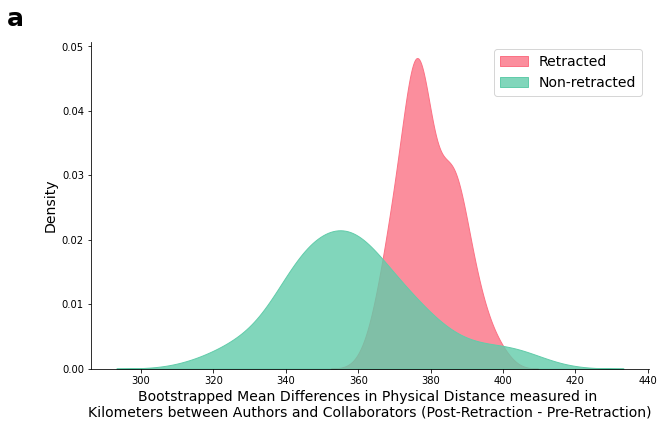

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt
fontsize=14

color_treatment = '#fb7285'
color_control = '#62ccaa'

# Create the KDE plot
plt.figure(figsize=(10, 6))


# KDE plot for retracted
sns.kdeplot(treatment_means, color=color_treatment, label='Retracted', shade=True, alpha=0.8)


# KDE plot for matched
sns.kdeplot(control_means, color=color_control, label='Non-retracted', shade=True, alpha=0.8)

# Add title and labels
plt.xlabel('Bootstrapped Mean Differences in Physical Distance measured in \nKilometers between Authors and Collaborators (Post-Retraction - Pre-Retraction)',
          fontsize=fontsize)
plt.ylabel('Density',fontsize=fontsize)

plt.text(-0.15, 1.05, 'a', transform=plt.gca().transAxes, fontsize=25, fontweight='bold', ha='left')

# Add legend
plt.legend(fontsize=fontsize)

sns.despine()

# Show the plot
plt.savefig(OUTDIR+"collaborator_geo_analysis_new.pdf", format='pdf')

In [289]:
tc_prepost

,MAGAID,Distance_km_treatment_pre,Distance_km_treatment_post,Distance_km_control_pre,Distance_km_control_post,TreatmentDifferenceInDistancePOST-PRE,ControlDifferenceInDistancePOST-PRE
0,2.184860e+06,810.283681,1317.793874,0.000000,943.227037,507.510193,943.227037
1,1.373700e+07,189.087962,231.984254,2.247648,1427.331932,42.896292,1425.084285
2,1.910029e+07,1211.853165,2970.415871,284.352814,2458.852663,1758.562706,2174.499849
3,2.168694e+07,9991.692613,1194.082759,389.770589,280.455402,-8797.609854,-109.315187
4,2.224799e+07,2885.306126,4101.618905,2001.917594,1510.787003,1216.312779,-491.130592
...,...,...,...,...,...,...,...
1117,3.158630e+09,0.000000,0.000000,2487.552728,1006.767156,0.000000,-1480.785573
1118,3.164389e+09,529.726277,1212.633579,0.000000,0.000000,682.907302,0.000000
1119,3.166925e+09,1557.963225,1747.188206,149.303604,11.336823,189.224981,-137.966781
1120,3.174844e+09,1296.816429,4967.462173,1422.781505,309.879832,3670.645745,-1112.901674


1224 1224
1114


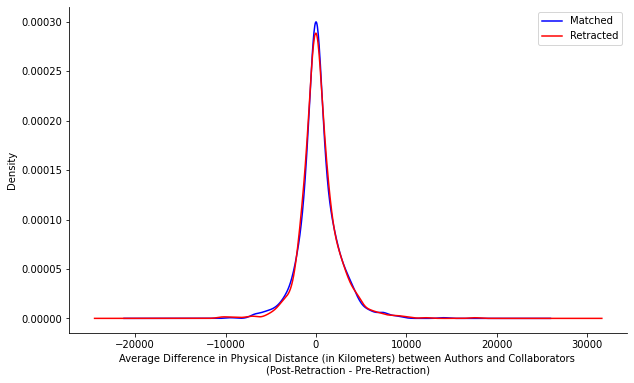

In [301]:
# Choosing random match from control for each MAGAID
df_random_match_control = df_collabs_geo_control_wDist[~df_collabs_geo_control_wDist['Distance_km'].isna()]

df_random_match_control = df_random_match_control[['MAGAID','MatchMAGAID']].drop_duplicates()

df_random_match_control = df_random_match_control.groupby('MAGAID')\
                                .apply(lambda x: x.sample(1)).reset_index(drop=True)

# Getting the whole dataframe
df_random_match_control = df_collabs_geo_control_wDist.merge(df_random_match_control,
                                                            on=['MAGAID','MatchMAGAID'])

# Again ensuring both treatment and control have same magaids

magaids_intersection = set(df_random_match_control['MAGAID'])\
                            .intersection(set(df_collabs_geo_treatment_wDist['MAGAID']))

df_random_match_control = df_random_match_control[df_random_match_control['MAGAID'].isin(magaids_intersection)]

# same for treatment
df_collabs_geo_treatment_wDist = df_collabs_geo_treatment_wDist[df_collabs_geo_treatment_wDist['MAGAID']\
                                                                .isin(magaids_intersection)]


print(df_random_match_control['MAGAID'].nunique(), df_collabs_geo_treatment_wDist['MAGAID'].nunique())


# separating pre and post collaborator distances for treatment and control

treatment_pre = df_collabs_geo_treatment_wDist[df_collabs_geo_treatment_wDist['PrePostFlag']=='Pre']\
                    [['MAGAID','MAGCollabAID','Distance_km']].drop_duplicates()

treatment_post = df_collabs_geo_treatment_wDist[df_collabs_geo_treatment_wDist['PrePostFlag']=='Post']\
                    [['MAGAID','MAGCollabAID','Distance_km']].drop_duplicates()


control_pre = df_random_match_control[df_random_match_control['PrePostFlag']=='Pre']\
                    [['MAGAID','MAGCollabAID','Distance_km']].drop_duplicates()

control_post = df_random_match_control[df_random_match_control['PrePostFlag']=='Post']\
                    [['MAGAID','MatchMAGAID','MAGCollabAID','Distance_km']].drop_duplicates()


tpre = treatment_pre.groupby(['MAGAID'])['Distance_km'].mean().reset_index()\
            .rename(columns={'Distance_km':'Distance_km_treatment_pre'})

tpost = treatment_post.groupby(['MAGAID'])['Distance_km'].mean().reset_index()\
            .rename(columns={'Distance_km':'Distance_km_treatment_post'})

cpre = control_pre.groupby(['MAGAID'])['Distance_km'].mean().reset_index()\
            .rename(columns={'Distance_km':'Distance_km_control_pre'})
cpost = control_post.groupby(['MAGAID'])['Distance_km'].mean().reset_index()\
            .rename(columns={'Distance_km':'Distance_km_control_post'})

tc_prepost = tpre.merge(tpost, on='MAGAID').merge(cpre, on='MAGAID').merge(cpost, on='MAGAID')
tc_prepost = tc_prepost.dropna()

print(tc_prepost['MAGAID'].nunique())


tc_prepost['TreatmentDifferenceInDistancePOST-PRE'] = tc_prepost['Distance_km_treatment_post'] - \
                                                            tc_prepost['Distance_km_treatment_pre']

tc_prepost['ControlDifferenceInDistancePOST-PRE'] = tc_prepost['Distance_km_control_post'] - \
                                                            tc_prepost['Distance_km_control_pre']

# Create the KDE plot
plt.figure(figsize=(10, 6))

# KDE plot for matched
tc_prepost['ControlDifferenceInDistancePOST-PRE'].plot.kde(color='blue', label='Matched')

# KDE plot for retracted
tc_prepost['TreatmentDifferenceInDistancePOST-PRE'].plot.kde(color='red', label='Retracted')

# Remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Add legend
plt.legend()

# Add title and labels
plt.title('')
plt.xlabel('Average Difference in Physical Distance (in Kilometers) between Authors and Collaborators \n(Post-Retraction - Pre-Retraction)')
plt.ylabel('Density')

# Show the plot
plt.show()